In [9]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [8]:
from scipy.stats import poisson
from scipy.optimize import minimize
from scipy.special import gamma
import math
from scipy.stats.distributions import chi2
from math import factorial

# Part I

In [5]:
candy = pd.read_csv('/Users/asadmemon/Downloads/candy(1).csv')
candy.head(10)

,Packs,People
0,0,102
1,1,54
2,2,49
3,3,62
4,4,44
5,5,25
6,6,26
7,7,15
8,8,15
9,9,10


In [7]:
candy.describe()

,Packs,People
count,21.000000,21.000000
mean,10.000000,21.714286
std,6.204837,26.306164
min,0.000000,1.000000
25%,5.000000,4.000000
50%,10.000000,10.000000
75%,15.000000,26.000000
max,20.000000,102.000000


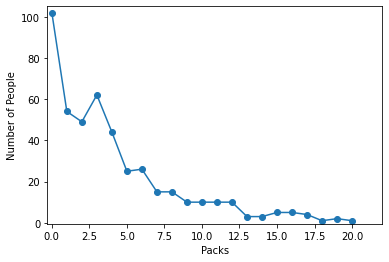

In [10]:
plt.xlim([-0.3, 22])
plt.ylim([-0.5, 105])
plt.xlabel("Packs")
plt.ylabel("Number of People")
plt.scatter(candy.Packs, data_cd.People)
plt.plot(candy.Packs, data_cd.People)
plt.show()

# the Poisson Model

In [39]:
# parammeters: decision variables

def LL1(params, inputs):
    lambda_v = params
    probs = []
    lls = []

    pds = list(range(len(inputs)))
    for i in pds:
#         prob = poisson.pmf(inputs[i,0], lambda_v[[0]])
        prob = (lambda_v**inputs[i,0] * math.exp(-lambda_v))/math.factorial(inputs[i,0])
        probs.append(prob)
        ll = inputs[i,1] * math.log(prob)
        lls.append(ll)

    return lls

In [40]:
def NLL1(params, inputs):
    return(-np.sum(LL1(params, inputs)))

In [41]:

params = np.array((0.5))
inputs = np.array(candy)

In [43]:

soln1 = minimize(
    NLL1,
    args = inputs,
    x0 = params,
    bounds=[(0.000001, None)],
    tol=1e-10,
    options={'ftol' : 1e-8},
)

In [44]:
soln1

      fun: 1544.9963904489794
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.8212103e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 20
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([3.9912276])

In [60]:
lambda_ = soln1.x[0].round(2)
lambda_

3.99

 lambda is 3.99, and the maximum value of the log-likelihood is -1544.9964. 

# NBD Model

In [46]:
# params: decision variables

def LL2(params, inputs):
    shape_n,alpha = params

    probs = []
    lls = []
    pds = list(range(len(inputs)))
    
    for i in pds:
        if i == 0:
            prob = (alpha/(alpha+1))**shape_n
            probs.append(prob)
            ll = inputs[0,1] * math.log(prob)
            lls.append(ll)
        else:
            prob = ((shape_n+inputs[i,0]-1)/(inputs[i,0]*(alpha+1)))*probs[i-1]
            probs.append(prob)
            ll = inputs[i,1] * math.log(prob)
            lls.append(ll)
        
# return the log-likelihood expression
    return lls

In [47]:
def NLL2(params, inputs):
    return(-np.sum(LL2(params, inputs)))

In [48]:
params = np.array((1, 0.5))
inputs = np.array(data_cd)

In [49]:

soln2 = minimize(
    NLL2,
    args = inputs,
    x0 = params,
    bounds=[(0.000001, None),(0.000001, None)],
    tol=1e-10,
    options={'ftol' : 1e-8},
)

In [50]:
soln2

      fun: 1140.0237462438763
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00404725,  0.00111413])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([0.99762761, 0.24995524])

In [51]:
shape_n = soln2.x[0].round(3)
alpha = soln2.x[1].round(2)

print('shape_n:', shape_n, '\nalpha:', alpha)

shape_n: 0.998 
alpha: 0.25


shape_n and alpha are 0.99 and 0.2500 and the maximum value of the log-likelihood is -1140.02

# Zero Inﬂated NBD model

In [54]:


def LL3(params, inputs):
    shape_n, alpha, pi = params

    nbds = []
    lls = []
    
    pds = list(range(len(inputs)))
    
    for i in pds:
        if i == 0:
            nbd = (alpha/(alpha+1))**shape_n
            nbds.append(nbd)
            prob = pi + (1-pi)*nbd
            ll = inputs[0,1] * math.log(prob)
            lls.append(ll)
        else:
            nbd = ((shape_n+inputs[i,0]-1)/(inputs[i,0]*(alpha+1)))*nbds[i-1]
            nbds.append(nbd)
            prob = (1-pi)*nbd
            ll = inputs[i,1] * math.log(prob)
            lls.append(ll)
            
    return lls

In [55]:
def NLL3(params, inputs):
    return(-np.sum(LL3(params, inputs)))

In [56]:
params = np.array([1, 0.5, 0.1])
inputs = np.array(candy)

In [57]:

soln3 = minimize(
    NLL3,
    args = inputs,
    x0 = params,
    bounds=[(0.000001, None), (0.000001, None), (0.000001, None)],
    tol=1e-10,
    options={'ftol' : 1e-8},
)

In [58]:
soln3

      fun: 1136.16564084047
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.95807869e-04,  4.54747351e-05,  2.66027200e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 44
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([1.50389249, 0.33418248, 0.11310312])

#### Get shape_n, alpha & pi

In [61]:
shape_n = soln3.x[0].round(3)
alpha = soln3.x[1].round(3)
pi  = soln3.x[2].round(3)
print('shape_n:', shape_n, '\nalpha:', alpha, '\npi:', pi)

shape_n: 1.504 
alpha: 0.334 
pi: 0.113


<b> </b> shape_n, alpha and phi are 1.504, 0.334 and 0.113, and the maximum value of the log-likelihood is -1136.1656. 

### (d). Finite mixture models

### 2 Segments

In [62]:


def LL4(params, inputs):
    lambda1, lambda2, pi = params

# lls[]: log likelihood
    probs = []
    lls = []
    
    pds = list(range(len(inputs)))
    for i in pds:
        prob = pi * ((lambda1**inputs[i,0] * math.exp(-lambda1))/math.factorial(inputs[i,0])) + (1 - pi) * ((lambda2**inputs[i,0] * math.exp(-lambda2))/math.factorial(inputs[i,0])) 
        probs.append(prob)
        ll = inputs[i,1] * math.log(prob)
        lls.append(ll)
    return lls

In [63]:
def NLL4(params, inputs):
    return(-np.sum(LL4(params, inputs)))

In [64]:
params = np.array([0.1, 0.1, 0.1])
inputs_data = candy.copy()

In [66]:

soln4= minimize(
    NLL4,
    args = inputs,
    x0 = params,
    bounds=[(0.000001, None), (0.000001, None), (0.000001, None)],
    tol=1e-10,
    options={'ftol' : 1e-8},
)

In [67]:
soln4

      fun: 1188.8328271736993
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0001819 ,  0.00011369, -0.0013415 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 16
     njev: 18
   status: 0
  success: True
        x: array([1.802153  , 9.12069679, 0.7008856 ])

####  lambdas and phi

In [68]:
lambda1 = soln4.x[0]
lambda2 = soln4.x[1]
pi = soln4.x[2]
print('lambda1:', lambda1, '\nlambda2:', lambda2, '\npi:', pi)

lambda1: 1.802153001604175 
lambda2: 9.120696789684153 
pi: 0.7008855952860611


<b> Observation I-1d1: </b> The estimated parameter lambda1, lambda2, pi are 1.8022, 9.1207, 0.7009, and the maximum value of the log-likelihood is -1188.8328. 

### 3 Segments

In [69]:


def LL5(params, inputs):
    lambda1, lambda2, lambda3, theta1, theta2, theta3 = params
    theta1_exp = math.exp(theta1)
    theta2_exp = math.exp(theta2)
    theta3_exp = math.exp(theta3)
    theta_exp_sum = theta1_exp + theta2_exp + theta3_exp
    pert1 = theta1_exp/theta_exp_sum
    pert2 = theta2_exp/theta_exp_sum
    pert3 = theta3_exp/theta_exp_sum
    
    probs = []
    lls = []
    
    pds = list(range(len(inputs)))
    for i in pds:
        prob = pert1 * ((lambda1**inputs[i,0] * math.exp(-lambda1))/math.factorial(inputs[i,0])) + pert2 * ((lambda2**inputs[i,0] * math.exp(-lambda2))/math.factorial(inputs[i,0])) + pert3 * ((lambda3**inputs[i,0] * math.exp(-lambda3))/math.factorial(inputs[i,0])) 
        probs.append(prob)
        ll = inputs[i,1] * math.log(prob)
        lls.append(ll)
        # return the log-likelihood expression
    return lls

In [70]:
def NLL5(params, inputs):
    return(-np.sum(LL5(params, inputs)))

In [71]:
params = np.array([0.1, 1, 10, 0.1, 0.1, 0.1])

inputs_data = candy.copy()

In [73]:

soln5 = minimize(
    NLL5,
    args = inputs,
    x0 = params,
    bounds=[(0.000001, None), (0.000001, None), (0.000001, None), (0.000001, None), (0.000001, None), (0.000001, None)],
    tol=1e-10,
    options={'ftol' : 1e-8},
)

In [74]:
soln5

      fun: 1132.0429842564893
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.82121027e-05, -6.82121030e-05,  2.27373657e-05,  0.00000000e+00,
        6.82121030e-05, -6.82121026e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 119
      nit: 15
     njev: 17
   status: 0
  success: True
        x: array([ 0.29054117,  3.48331462, 11.21580111,  0.46216205,  1.13659174,
        0.03174029])

In [76]:
lambda1 = soln5.x[0]
lambda2 = soln5.x[1]
lambda3 = soln5.x[2]
theta1 = soln5.x[3]
theta2 = soln5.x[4]
theta3 = soln5.x[5]
print('lambda1:', lambda1, '\nlambda2:', lambda2, '\nlambda3:', lambda3, '\ntheta1:', theta1, '\ntheta2:', theta2, '\ntheta3:', theta3)

lambda1: 0.29054116772455 
lambda2: 3.4833146209446104 
lambda3: 11.215801106983662 
theta1: 0.4621620526587123 
theta2: 1.1365917368169594 
theta3: 0.031740287843917726


<b> Observation I-1d2: </b> parameter lambda1, lambda2, lambda3, theta1, theta2, and theta3 are 0.2905, 3.4833, 11.2158, 0.4622, 1.1366, 0.0317 and the maximum value of the log-likelihood is -1132.0430. 

### 4 Segments

In [77]:


def LL6(params, inputs):
    lambda1, lambda2, lambda3, lambda4, theta1, theta2, theta3, theta4 = params
    theta1_exp = math.exp(theta1)
    theta2_exp = math.exp(theta2)
    theta3_exp = math.exp(theta3)
    theta4_exp = math.exp(theta4)
    theta_exp_sum = theta1_exp + theta2_exp + theta3_exp + theta4_exp
    pert1 = theta1_exp/theta_exp_sum
    pert2 = theta2_exp/theta_exp_sum
    pert3 = theta3_exp/theta_exp_sum
    pert4 = theta4_exp/theta_exp_sum
    
    probs = []
    lls = []
    
    pds = list(range(len(inputs)))
    for i in pds:
        prob = pert1 * ((lambda1**inputs[i,0] * math.exp(-lambda1))/math.factorial(inputs[i,0])) + pert2 * ((lambda2**inputs[i,0] * math.exp(-lambda2))/math.factorial(inputs[i,0])) + pert3 * ((lambda3**inputs[i,0] * math.exp(-lambda3))/math.factorial(inputs[i,0])) + pert4 * ((lambda4**inputs[i,0] * math.exp(-lambda4))/math.factorial(inputs[i,0]))
        probs.append(prob)
        ll = inputs[i,1] * math.log(prob)
        lls.append(ll)
    return lls

In [78]:
def NLL6(params, inputs):
    return(-np.sum(LL6(params, inputs)))

In [79]:
params = np.array([3, 0.1, 1, 10, 0.1, 0.1, 0.1, 0.1])
inputs_data = candy.copy()

In [80]:

soln6 = minimize(
    NLL6,
    args = inputs,
    x0 = params,
    bounds=[(0.000001, None), (0.000001, None), (0.000001, None), (0.000001, None), (0.000001, None), (0.000001, None), (0.000001, None), (0.000001, None)],
    tol=1e-10,
    options={'ftol' : 1e-8},
)

In [81]:
soln6

      fun: 1130.0705944310007
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.54747354e-04, -7.82165444e-03, -5.91171560e-04,  6.82120970e-05,
        1.15960575e-03, -6.23003868e-03,  1.09139365e-03,  3.97903932e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 351
      nit: 35
     njev: 39
   status: 0
  success: True
        x: array([7.41529007e+00, 2.04470021e-01, 3.00115442e+00, 1.28710078e+01,
       3.97447809e-01, 8.74879880e-01, 1.59730090e+00, 1.00000000e-06])

In [82]:
lambda1 = soln6.x[0]
lambda2 = soln6.x[1]
lambda3 = soln6.x[2]
lambda4 = soln6.x[3]
theta1 = soln6.x[4]
theta2 = soln6.x[5]
theta3 = soln6.x[6]
theta4 = soln6.x[7]
print('lambda1:', lambda1, '\nlambda2:', lambda2, '\nlambda3:', lambda3, '\nlambda4:', lambda4, '\ntheta1:', theta1, '\ntheta2:', theta2, '\ntheta3:', theta3, '\ntheta4:', theta4)

lambda1: 7.41529007268682 
lambda2: 0.20447002088960733 
lambda3: 3.0011544201450358 
lambda4: 12.871007759336745 
theta1: 0.39744780898869453 
theta2: 0.8748798803072207 
theta3: 1.5973008953474823 
theta4: 1e-06


<b> Observation I-1d4: </b> parameter lambda1, lambda2, lambda3, lambda4, theta1, theta2, theta3 and theta4 are 7.4153, 0.2045, 3.0012, 12.8710, 0.3974, 0.8749, 1.5973, 1e-06  and the maximum value of the log-likelihood is -1132.0430. 

## I-2. Evaluate the models developed; explain which of them is best, and why. 

Are there any signiﬁcant diﬀerences among the results from these models? If so, what exactly are these diﬀerences? Discuss what you believe could be causing the diﬀerences.

### comparing the Log-likelihood Ratios for the highest



(a) Poisson model: -1544.99

(b) NBD model: -1140

(c) Zero Inflated NBD model: -1136.1656
 
(d) Finite Mixture models: 

2 Segments: -1188.8328

3 Segments: -1132.0430

4 Segments: -1130.0706


In [87]:
LL_poisson = -1544.99
LL_nbd = -1140.023
LL_zinbd = -1136.16
LL_2seg = -1188.83
LL_3seg = -1132.04
LL_4seg = -1130.07

4-segment Finite Mixture Model has the highest log-likelihood and hence is the best

### Method 2: AIC


In [88]:
AIC_pois = -2 * LL_poisson + 2 * 1
AIC_pois

3091.98

In [89]:
AIC_nbd = -2 * LL_nbd + 2 * 2
AIC_nbd

2284.046

In [90]:
AIC_zi = -2 * LL_zinbd + 2 * 3
AIC_zi

2278.32

In [91]:
AIC_2seg = -2 * LL_2seg + 2 * 3
AIC_2seg

2383.66

In [92]:
AIC_3seg = -2 * LL_3seg + 2 * 5
AIC_3seg

2274.08

In [93]:
AIC_4seg = -2 * LL_4seg + 2 * 7
AIC_4seg

2274.14

<b> Q2 </b> 

using the AIC criteria , the best model is 3-segment Finite Mixture Model with lowest AIC, which is 2274.08

### Method 3: BIC


In [99]:
N_rows = data_cd.shape[0]
BIC_poisson = -2 * LL_poisson + np.log(N) * 1
BIC_poisson

3093.0245224377236

In [100]:
BIC_nbd = -2 * LL_nbd + np.log(N_rows) * 2
BIC_nbd

2286.1350448754465

In [101]:
BIC_zinbd = -2 * LL_zinbd + np.log(N_rows) * 3
BIC_zinbd

2281.4535673131704

In [102]:
# For 2-segment Finite Mixture Model, with 3 parameters
BIC_2seg = -2 * LL_2seg + np.log(N_rows) * 3
BIC_2seg

2386.79356731317

In [103]:
# For 3-segment Finite Mixture Model, with 5 parameters
BIC_3seg = -2 * LL_3seg + np.log(N_rows
                                ) * 5
BIC_3seg

2279.302612188617

In [104]:
# For 4-segment Finite Mixture Model, with 7 parameters
BIC_4seg = -2 * LL_4seg + np.log(N) * 7
BIC_4seg

2281.451657064064

<b> Observation I-2_3 </b> 

using BIC, the best model is 2-segment Finite Mixture Model with lowest BIC; 2386.79

<b> Observation I-2_4 </b>

Are there any significant differences among the results from these models? If so, what exactly are these differences? Discuss what you believe could be causing the differences? 

Loglikelihood value assesses the fitness of models. If more variables are added to the model, the Loglikelihood value will increase but we cant trust the variables to have significant explanatory power


AIC penalizes the model with more parameters by taking into consideration both the loglikelihood values and the no of parameters. The model with the lowest AIC is the 3-segment Finite Mixture Model

BIC penalizes the model with more parameters and a higher number of observations. THe 2-segment Finite Mixture Model  has the lowest BIC. 

## I-3
Based on the 2, 3, and 4-segment ﬁnite mixture models, how many packs are the following customers likely to purchase over the next 8 weeks?

### (a) a customer who purchased 5 packs in the past week

<b> 2-segment Finite Mixture Model </b>

 lambda1, lambda2, pi are 1.8022, 9.1207, 0.7009.



$p(s=1|x=5) =   0.5156$

$p(s=2|x=5) = 0.4844$

likely to purchase in 8 weeks = 8 * (0.5156 * 1.8022 + 0.4844 * 9.1207) = 42.77


<b> 3-segment Finite Mixture Model </b>

 lambda1, lambda2, lambda3, theta1, theta2, and theta3 are 0.2905, 3.4833, 11.2158, 0.4622, 1.1366, 0.0317.



$p(s=1|x=5) =  0.0001$

$p(s=2|x=5) =0.9521$

$p(s=3|x=5) =0.0478$

likely to purchase in 8 weeks = 8 * (0.0001 * 0.2905 + 0.9521 * 3.4833 + 0.0478 * 11.2158) = 30.8250


<b> 4-segment Finite Mixture Model </b>

 lambda1, lambda2, lambda3, lambda4, theta1, theta2, theta3 and theta4 are 7.4153, 0.2045, 3.0012, 12.8710, 0.3974, 0.8749, 1.5973, and 1e-06.



$p(s=1|x=5) =0.2485$

$p(s=2|x=5) =0.0001$

$p(s=3|x=5) =0.7402$

$p(s=4|x=5) = 0.0112$

likely to purchase in 8 weeks = 8 * (0.2485 * 7.4153 + 0.0001 * 0.2045 + 0.7402 * 3.0012 + 0.0112 * 12.8710) = 33.6737


### (b) a customer who purchased 9 packs in the past week

<b> 2-segment Finite Mixture Model </b>

The estimated parameter lambda1, lambda2, pi are 1.8022, 9.1207, 0.7009.



$p(s=1|x=9) = 0.0016$

$p(s=2|x=9) = 0.9984$

likely to purchase in 8 weeks = 8 * (0.0016 * 1.8022 + 0.9984 * 9.1207) = 72.8708


<b> 3-segment Finite Mixture Model </b>

The estimated parameters lambda1, lambda2, lambda3, theta1, theta2, and theta3 are 0.2905, 3.4833, 11.2158, 0.4622, 1.1366, 0.0317.



$p(s=1|x=9) = 0.0000$

$p(s=2|x=9) = 0.1562$

$p(s=3|x=9) = 0.8438$

likely to purchase in 8 weeks = 8 * (0.0000 * 0.2905 + 0.1562 * 3.4833 + 0.8438 * 11.2158) = 80.0632


<b> 4-segment Finite Mixture Model </b>

 lambda1, lambda2, lambda3, lambda4, theta1, theta2, theta3 and theta4 are 7.4153, 0.2045, 3.0012, 12.8710, 0.3974, 0.8749, 1.5973, and 1e-06.



$p(s=1|x=9) = 0.6709$

$p(s=2|x=9) = 0.0000$

$p(s=3|x=9) =  0.0536$

$p(s=4|x=9) =0.2755$

likely to purchase in 8 weeks = 8 * (0.6709 * 7.4153 + 0.0000 * 0.2045 + 0.0536 * 3.0012 + 0.2755 * 12.8710) = 69.4516


# Part II

In this question, you will apply the ideas learned in this course to build a model that you have not seen before
– the Zero Inflated NBD Regression.

# Q-3 Part

In [14]:
articles = pd.read_csv('/Users/asadmemon/Downloads/articles.csv')

In [37]:


def LL7(params, inputs):
    shape_n, alpha, pi, beta1, beta2, beta3, beta4, beta5 = params

    exp_betaXs = []
    P1s = []
    P2s = []
    P3s = []
    probs = []
    lls = []
    
    pds = list(range(len(inputs)))
    for i in pds:
        exp_betaX = math.exp(beta1*inputs[i,1]+beta2*inputs[i,2]+beta3*inputs[i,3]+beta4*inputs[i,4]+beta5*inputs[i,5])
        exp_betaXs.append(exp_betaX)
        P1 = gamma(shape_n+inputs[i,0])/(gamma(shape_n)*factorial(inputs[i,0]))
        P1s.append(P1)
        P2 = (alpha/(alpha+exp_betaX))**shape_n
        P2s.append(P2) 
        P3 = (exp_betaX/(alpha + exp_betaX))**inputs[i,0]
        P3s.append(P3) 
        if inputs[i,0] == 0:
            prob = pi + (1-pi)*(P1*P2*P3)
        else:
            prob = P1*P2*P3
        probs.append(prob)
        ll = math.log(prob)
        lls.append(ll)
    return lls




In [38]:
def NLL7(params, inputs):
    return(-np.sum(LL7(params, inputs)))

In [39]:
params = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
inputs = np.array(articles)
inputs

array([[ 0.  ,  0.  ,  1.  ,  0.  ,  2.52,  7.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  2.05,  6.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  3.75,  6.  ],
       ...,
       [12.  ,  0.  ,  1.  ,  1.  ,  1.86,  5.  ],
       [16.  ,  0.  ,  1.  ,  0.  ,  1.74, 21.  ],
       [19.  ,  0.  ,  1.  ,  0.  ,  1.86, 42.  ]])

In [40]:

soln7 = minimize(
    NLL7,
    args = inputs,
    x0 = params,
    bounds=[(0.000001, None), (0.000001, None), (0, 1),(None, None),(None, None),(None, None),(None, None),(None, None)],
    tol=1e-10,
    options={'ftol' : 1e-8},
)

/var/folders/jt/j21fv8150q3cp8lwv8p5d2680000gn/T/ipykernel_73774/2509062279.py:15: DeprecationWarning: Using factorial() with floats is deprecated
  P1 = gamma(shape_n+inputs[i,0])/(gamma(shape_n)*factorial(inputs[i,0]))


In [41]:
shape_n = round(soln7.x[0], 4)
alpha = round(soln7.x[1], 4)
pi = round(soln7.x[2], 4)
beta1 = round(soln7.x[3], 4)
beta2 = round(soln7.x[4], 4)
beta3 = round(soln7.x[5], 4)
beta4 = round(soln7.x[6], 4)
beta5 = round(soln7.x[7], 4)
print('shape_n:', shape_n, '\nalpha:', alpha, '\npi:', pi, 
      '\nbeta1:', beta1, '\nbeta2:', beta2, '\nbeta3:',
      beta3, '\nbeta4:', beta4, '\nbeta5:', beta5)

shape_n: 13.0344 
alpha: 5.7545 
pi: 1.0 
beta1: -0.1591 
beta2: 0.0666 
beta3: -0.097 
beta4: -0.0117 
beta5: 0.0154


In [42]:
soln7

      fun: 1149.7585988968804
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.27373657e-05, -2.27373677e-05, -2.37628454e+02,  7.41238182e-03,
        2.72848411e-03, -1.14141585e-02, -5.00222086e-03,  1.38470568e-02])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 612
      nit: 56
     njev: 68
   status: 0
  success: True
        x: array([ 1.30343804e+01,  5.75454835e+00,  1.00000000e+00, -1.59121902e-01,
        6.66111609e-02, -9.70200544e-02, -1.16534625e-02,  1.53892750e-02])